In [3]:
import os

import pandas as pd

from tqdm import tqdm

In [2]:
problem_descriptions = pd.read_feather("./mini_codenet/problem_descriptions.ftr")
problem_descriptions

,pid,original,clean,lang
0,p03466,"<span class=""lang-en"">\n<p>Score : <var>1100</...",Score : 1100 points \n\nProblem Statement Let ...,en
1,p03036,"<span class=""lang-en"">\n<p>Score : <var>200</v...",Score : 200 points \n\nProblem Statement The d...,en
2,p02277,"\n<H1>Quick Sort</H1>\n<!--\n<p style=""color:#...",Quick Sort \n\nPlease note that problem descri...,en
3,p03935,"<span class=""lang-en lang-child hidden-lang"">\...",Max Score: $1400$ Points \n\nProblem Statement...,en
4,p01908,"\n\n\n<script type=""text/x-mathjax-config"">\nM...",MathJax.Hub.Config({\ntex2jax: {inlineMath: [[...,ja
...,...,...,...,...
3994,p02126,<h1>Problem C: Ball</h1>\n\n<h2>Problem</h2>\n...,Problem C: Ball \n\nProblem \n\n$N$個のボールがあり、各ボ...,ja
3995,p03367,"<span class=""lang-en"">\n<p>Score : <var>1700</...",Score : 1700 points \n\nProblem Statement Snuk...,en
3996,p02825,"<span class=""lang-en"">\n<p>Score : <var>900</v...",Score : 900 points \n\nProblem Statement Let u...,en
3997,p00818,"\n<H1><font color=""#000"">Problem H:</font> Viv...",Problem H: Viva Confetti \n\nDo you know confe...,en


In [3]:
solutions = []

for filename in tqdm(os.listdir("./mini_codenet/")):
    if filename.startswith("p0"):
        problem_solutions = pd.read_feather(f"./mini_codenet/{filename}")

        if len(problem_solutions) == 0:
            continue

        problem_description = problem_descriptions[
            problem_descriptions["pid"] == filename[:-4]
        ]    

        if len(problem_description) == 0:
            problem_description_text = None
            problem_description_lang = None
        else:
            problem_description_text = problem_description["clean"].iloc[0]
            problem_description_lang = problem_description["lang"].iloc[0]

        problem_solutions["problem_description"] = problem_description_text
        problem_solutions["problem_language"] = problem_description_lang
        solutions.append(problem_solutions)

100%|██████████| 4052/4052 [00:14<00:00, 276.22it/s]


In [4]:
unified_data = pd.concat(solutions, axis=0)

unified_data

,index,submission_id,problem_id,language,filename_ext,status,cpu_time,memory,code_size,accuracy,solution,problem_description,problem_language
0,33,s266520642,p03916,C++,cpp,Accepted,417.0,25964.0,2391,NaN,#include <bits/stdc++.h>\n\nusing namespace st...,Score : 1600 points \n\nProblem Statement Ther...,en
1,0,s529292953,p03916,C++,cpp,Accepted,1462.0,57044.0,1356,NaN,#ifdef DEBUG\n#define _GLIBCXX_DEBUG\n#endif\n...,Score : 1600 points \n\nProblem Statement Ther...,en
2,12,s550275575,p03916,C++,cpp,Accepted,379.0,39168.0,2591,NaN,#include <bits/stdc++.h>\nusing namespace std;...,Score : 1600 points \n\nProblem Statement Ther...,en
3,230,s640549677,p03916,C++,cpp,Accepted,993.0,13056.0,726,NaN,#include <bits/stdc++.h>\n\nusing namespace st...,Score : 1600 points \n\nProblem Statement Ther...,en
4,40,s720089425,p03916,C++,cpp,Accepted,472.0,13164.0,729,NaN,#include<bits/stdc++.h>\nusing namespace std;\...,Score : 1600 points \n\nProblem Statement Ther...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,57,s380605173,p03933,C,c,Wrong Answer,101.0,640.0,1078,NaN,#include<stdio.h>\n#include<stdlib.h>\n#includ...,Max Score: $850$ Points \n\nProblem statement ...,en
52,112,s764425622,p03933,C++,cpp,Wrong Answer,2102.0,1152.0,8558,NaN,/*include*/\n#include<iostream>\n#include<stri...,Max Score: $850$ Points \n\nProblem statement ...,en
53,23,s922139579,p03933,C++,cpp,Wrong Answer,2104.0,312704.0,1557,NaN,#include <bits/stdc++.h>\nusing namespace std;...,Max Score: $850$ Points \n\nProblem statement ...,en
54,85,s102218326,p03933,C++,cpp,Wrong Answer,2143.0,1052240.0,1117,NaN,// g++ Main.cpp -std=c++14\n#include <bits/std...,Max Score: $850$ Points \n\nProblem statement ...,en


<Axes: >

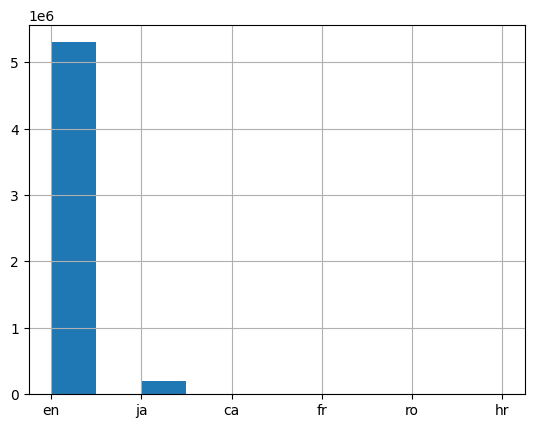

In [5]:
unified_data["problem_language"].hist()

In [6]:
en_unified_data = unified_data[unified_data["problem_language"] == "en"]
non_en_unified_data = unified_data[unified_data["problem_language"] != "en"]

In [7]:
en_unified_data.to_feather("./extracted/en_data.ftr")
non_en_unified_data.to_feather("./extracted/non_en_data.ftr")

In [12]:
print(pd.read_feather("./extracted/non_en_data.ftr")["solution"].iloc[6])

#include <bits/stdc++.h>
using namespace std;
typedef long long ll;
typedef unsigned long long ull;
typedef pair<ll, ll> P;
typedef pair<int ,P> P3;
typedef pair<P ,P> PP;
const ll MOD = ll(1e9+7);
const int IINF = INT_MAX;
const ll LLINF = LLONG_MAX;
const int MAX_N = int(1e5 + 5);
const double EPS = 1e-6;
const int di[] = {0, 1, 0, -1}, dj[] = {1, 0, -1, 0};
#define REP(i, n) for (int i = 0; i < n; i++)
#define REPR(i, n) for (int i = n; i >= 0; i--)
#define SORT(v) sort((v).begin(), (v).end())
#define ALL(v) (v).begin(), (v).end()

int main() {
    int n, cnt[26]{}, ans=0;
    string s;
    cin >> n >> s;
    for(auto c : s){
        if(c>='a' && c<= 'z') cnt[c-'a']++;
    }
    vector<int> ls;
    for(int i=9;i>1;i--){
        bool update = true;
        while(update){
            update = false;
            ls.clear();
            REP(j,26){
                if(cnt[j]>=i){
                    ls.push_back(j);
                }
            }
            if(ls.size()>=2){  // 同じ個数が2個